# **Credit Score Classification!📈💳**
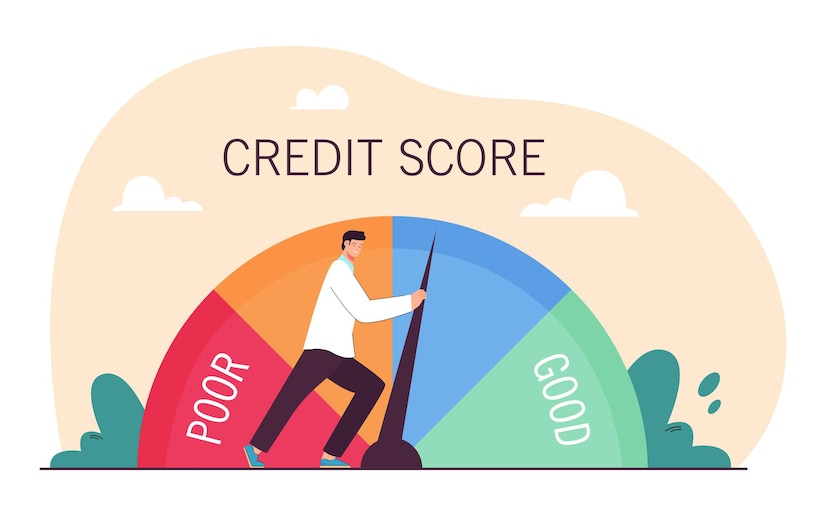

## Introduction

🌐 In today's financial landscape, credit scores play a pivotal role in assessing an individual's creditworthiness. Lenders, ranging from traditional banks to online lending platforms, heavily rely on credit scores to make informed decisions about extending credit. As the demand for credit continues to rise, the need for accurate and efficient credit score classification becomes paramount. Machine learning techniques offer a powerful toolset for analyzing vast amounts of financial data to predict and classify credit scores.

## Project Statement

🛠️ This project aims to explore and implement machine learning algorithms for credit score classification. By leveraging historical credit data, the objective is to train models that can accurately predict credit scores based on various financial and non-financial features.

> 🤖 The project will delve into feature engineering, model selection, and performance evaluation to create a robust and reliable credit scoring system. The ultimate goal is to contribute to the enhancement of credit risk assessment methodologies, providing financial institutions with more precise tools for evaluating potential borrowers. Through this exploration of machine learning in credit scoring, we aim to contribute to the ongoing evolution of the financial industry and promote more efficient and equitable lending practices 📈💳






## About the Dataset


**Dataset Size**

1.   train.csv - 100000 rows
2.   test.csv - 50000 rows

**Columns**

*   ID: Unique identifier for each record in the dataset.

*   Customer_ID: Unique identifier for each customer.
*   Month: The month for which the financial data is recorded.
*   Name: Name of the individual.
*   Age: Age of the individual.
*   SSN: Social Security Number, a unique identifier for individuals in the U.S.
*   Occupation: The occupation or profession of the individual.
*   Annual_Income: Annual income of the individual.
*   Monthly_Inhand_Salary: Net monthly salary after deductions.
*   Num_Bank_Accounts: Number of bank accounts held by the individual.
*   Num_Credit_Card: Number of credit cards owned by the individual.
*   Interest_Rate: Interest rate associated with financial transactions.
*   Num_of_Loan: Number of loans the individual has.
*   Type_of_Loan: The type of loan(s) the individual has.
*   Delay_from_due_date: Delay in payments from the due date.
*   Num_of_Delayed_Payment: Number of delayed payments.
*   Changed_Credit_Limit: Whether there has been a change in credit limit.
*   Num_Credit_Inquiries: Number of credit inquiries made.
*   Credit_Mix: The mix of different types of credit.
*   Outstanding_Debt: Amount of outstanding debt.
*   Credit_Utilization_Ratio: Ratio of credit used to the total credit available.
*   Credit_History_Age: Age of credit history.
*   Payment_of_Min_Amount: Payment behavior regarding the minimum amount due.
*   Total_EMI_per_month: Total Equated Monthly Installment (EMI) payments.
*   Amount_invested_monthly: Amount invested by the individual monthly.
*   Payment_Behaviour: Behavior related to payment patterns.
*   Monthly_Balance: Monthly balance in the account.
*   Credit_Score: The credit score assigned to the individual based on various factors.













## Data Pre-Processing

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [8]:
df = pd.read_csv("train.csv", low_memory=False)

In [9]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [10]:
print('Train Data Size : ',df.shape)

Train Data Size :  (100000, 28)


In [11]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [13]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

**Dataset consists of missing values.**

In [14]:
# Drop unnecessary columns
df.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan"],axis=1,inplace=True)

In [15]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

**There are still features that comprise of missing values. The categorical features must be converted to numerical in order to fill missing data**

In [16]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]

In [17]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')

Month:
Number of unique values in the Month: 8
Unique values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Age:
Number of unique values in the Age: 1788
Unique values: ['23' '-500' '28_' ... '4808_' '2263' '1342']


Occupation:
Number of unique values in the Occupation: 16
Unique values: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


Annual_Income:
Number of unique values in the Annual_Income: 18940
Unique values: ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']


Num_of_Loan:
Number of unique values in the Num_of_Loan: 434
Unique values: ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1

In [18]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)
df.drop(df[df["Credit_Mix"]=='_'].index,inplace=True)

## Data Encoding (Categorical ---> Numerical)

In [19]:
df["Month"].value_counts()

Month
July        9377
January     9341
March       9325
June        9295
April       9237
February    9210
August      9198
May         9181
Name: count, dtype: int64

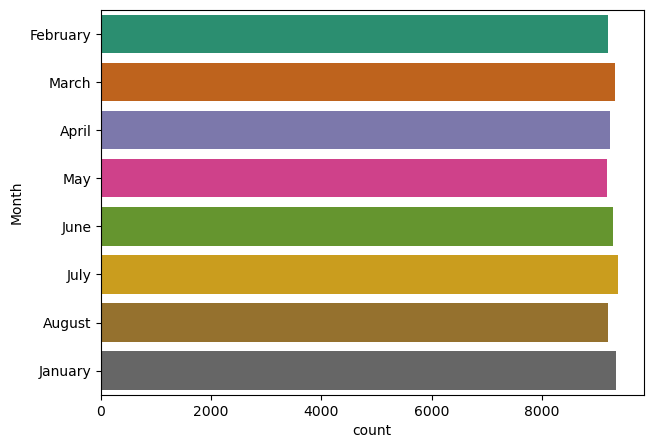

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(y="Month",data=df,palette="Dark2")
plt.show()

In [21]:
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8}
df['Month'] = df['Month'].replace(month_mapping)

In [22]:
df["Occupation"].value_counts()

Occupation
Lawyer           5259
Engineer         5077
Architect        5073
Scientist        5052
Accountant       5042
Mechanic         5001
Media_Manager    4978
Developer        4967
Teacher          4930
Entrepreneur     4911
Journalist       4884
Doctor           4860
Manager          4756
Musician         4702
Writer           4672
Name: count, dtype: int64

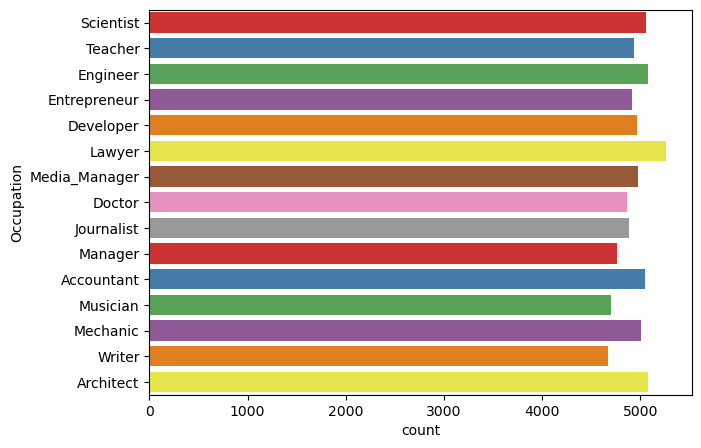

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(y="Occupation",data=df,palette="Set1")
plt.show()

In [24]:
occupation_mapping = {
    'Lawyer': 1,
    'Architect': 2,
    'Engineer': 3,
    'Scientist': 4,
    'Mechanic': 5,
    'Accountant': 6,
    'Developer': 7,
    'Media_Manager': 8,
    'Teacher': 9,
    'Entrepreneur': 10,
    'Doctor': 11,
    'Journalist': 12,
    'Manager': 13,
    'Musician': 14,
    'Writer': 15
}

df['Occupation'] = df['Occupation'].replace(occupation_mapping)


In [25]:
df["Credit_Mix"].value_counts()

Credit_Mix
Standard    33916
Good        22618
Bad         17630
Name: count, dtype: int64

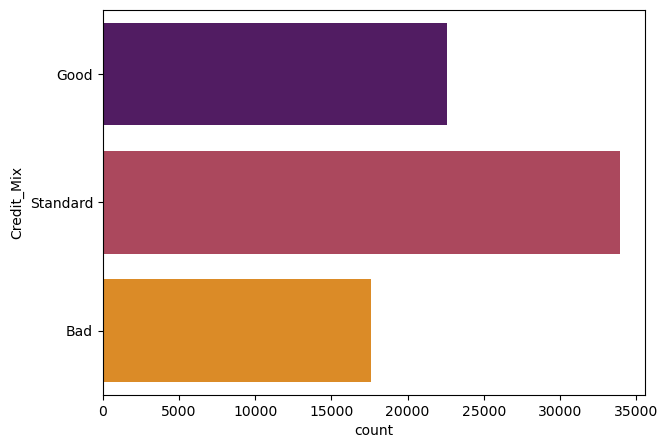

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(y="Credit_Mix",data=df,palette="inferno")
plt.show()

In [27]:
credit_map={"Good":1,"Standard":2,"Bad":3}
df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)

In [28]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      18866
High_spent_Medium_value_payments    13075
Low_spent_Medium_value_payments     10304
High_spent_Large_value_payments     10191
High_spent_Small_value_payments      8341
Low_spent_Large_value_payments       7711
!@9#%8                               5676
Name: count, dtype: int64

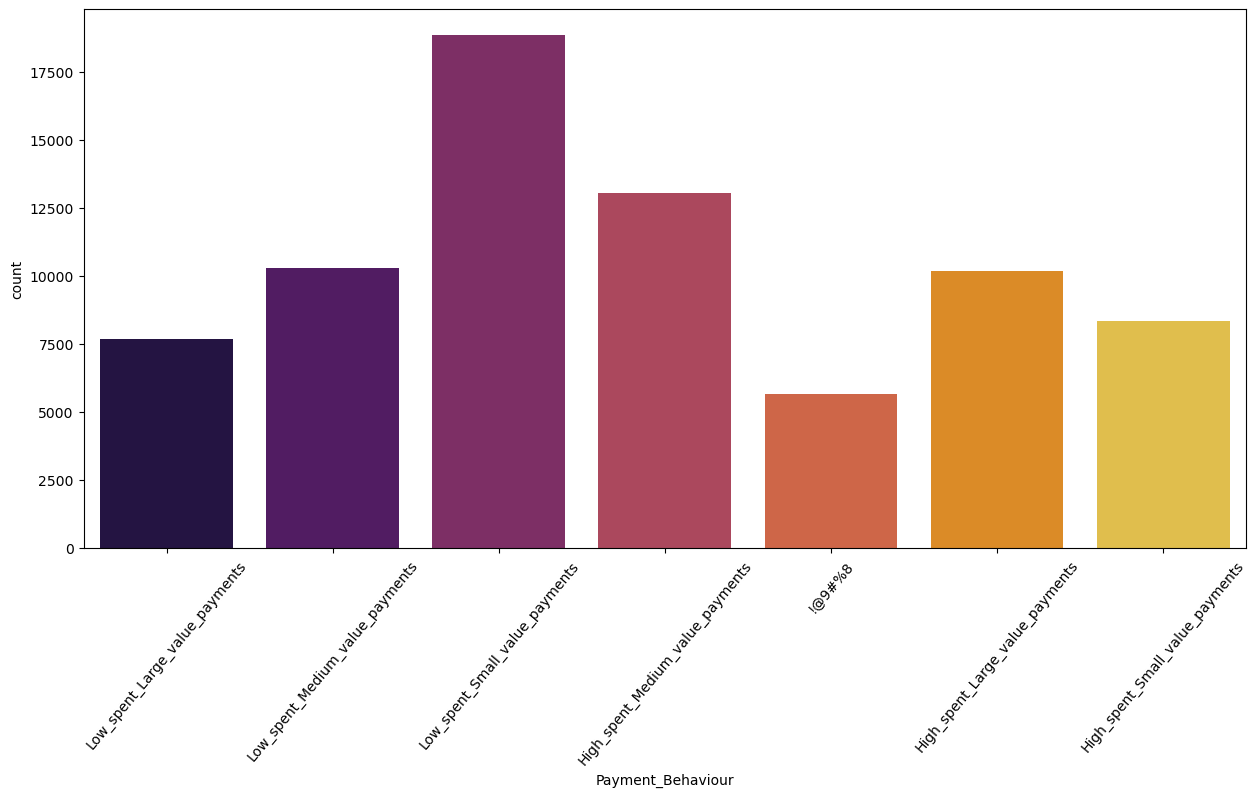

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x="Payment_Behaviour",data=df,palette="inferno")
plt.xticks(rotation=50)
plt.show()

In [30]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [31]:
category_mapping = {
    'Low_spent_Small_value_payments':1,
    'High_spent_Medium_value_payments':2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_mapping)

In [32]:
df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    38737
No     26501
NM      8926
Name: count, dtype: int64

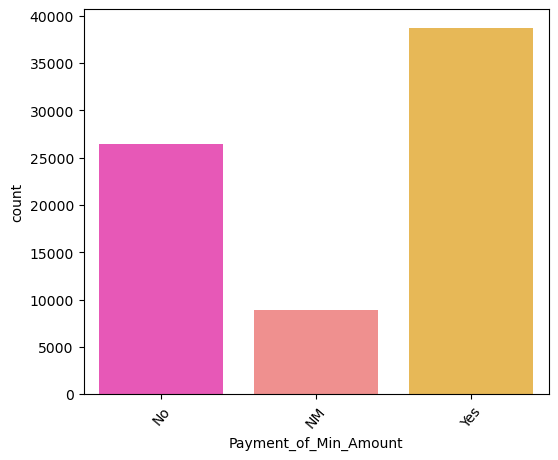

In [33]:
plt.figure(figsize=(6,5))
sns.countplot(x="Payment_of_Min_Amount",data=df,palette="spring")
plt.xticks(rotation=50)
plt.show()

In [34]:
pay_map={"Yes":1,"No":2,"NM":3}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)

In [35]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    39441
Poor        21509
Good        13214
Name: count, dtype: int64

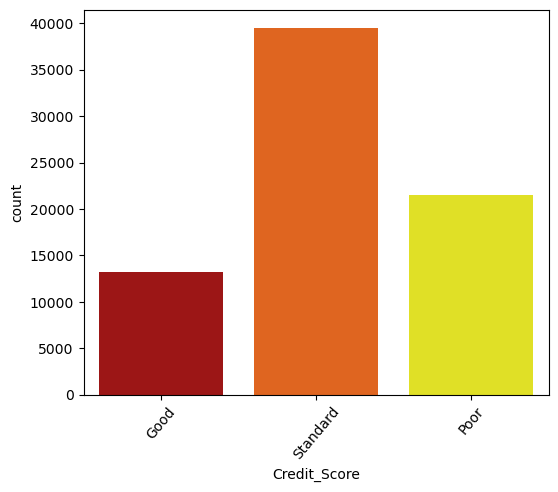

In [36]:
plt.figure(figsize=(6,5))
sns.countplot(x="Credit_Score",data=df,palette="hot")
plt.xticks(rotation=50)
plt.show()

In [37]:
score_map={"Standard":0,"Poor":1,"Good":2}
df['Credit_Score'] = df['Credit_Score'].replace(score_map)

## Handling Missing Data


In [38]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11112
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       5195
Changed_Credit_Limit            0
Num_Credit_Inquiries         1472
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           6717
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3356
Payment_Behaviour            5676
Monthly_Balance               906
Credit_Score                    0
dtype: int64

In [39]:
mean_salary = df["Monthly_Inhand_Salary"].mean()
df["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)

In [40]:
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce")
n_mean=df["Num_of_Delayed_Payment"].mean()
df["Num_of_Delayed_Payment"].fillna(n_mean, inplace=True)

In [41]:
in_mean=df["Num_Credit_Inquiries"].mean()
df["Num_Credit_Inquiries"].fillna(in_mean, inplace=True)

In [42]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)')

In [43]:
df["Credit_History_Age"] = pd.to_numeric(df["Credit_History_Age"], errors="coerce")
credit_mean=df["Credit_History_Age"].mean()
df["Credit_History_Age"].fillna(credit_mean, inplace=True)

In [44]:
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")
invest_mean=df["Amount_invested_monthly"].mean()
df["Amount_invested_monthly"].fillna(invest_mean, inplace=True)

In [45]:
df.dropna(subset=["Payment_Behaviour"], inplace=True)

In [46]:
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
month_mean=df["Monthly_Balance"].mean()
df["Monthly_Balance"].fillna(month_mean, inplace=True)

In [47]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**All missing values have been handled**

In [48]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")
an_mean=df["Annual_Income"].mean()
df["Annual_Income"].fillna(an_mean, inplace=True)

In [49]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [50]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)  # Replace '_' with 0
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")
c_mean=df["Changed_Credit_Limit"].mean()
df["Changed_Credit_Limit"].fillna(c_mean, inplace=True)

In [51]:
df['Age'] = df['Age'].replace('-500',np.nan)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
age_mean=df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)

In [52]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")
num_mean=df["Num_of_Loan"].mean()
df["Num_of_Loan"].fillna(num_mean, inplace=True)

In [53]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].abs()

## Data Visualization

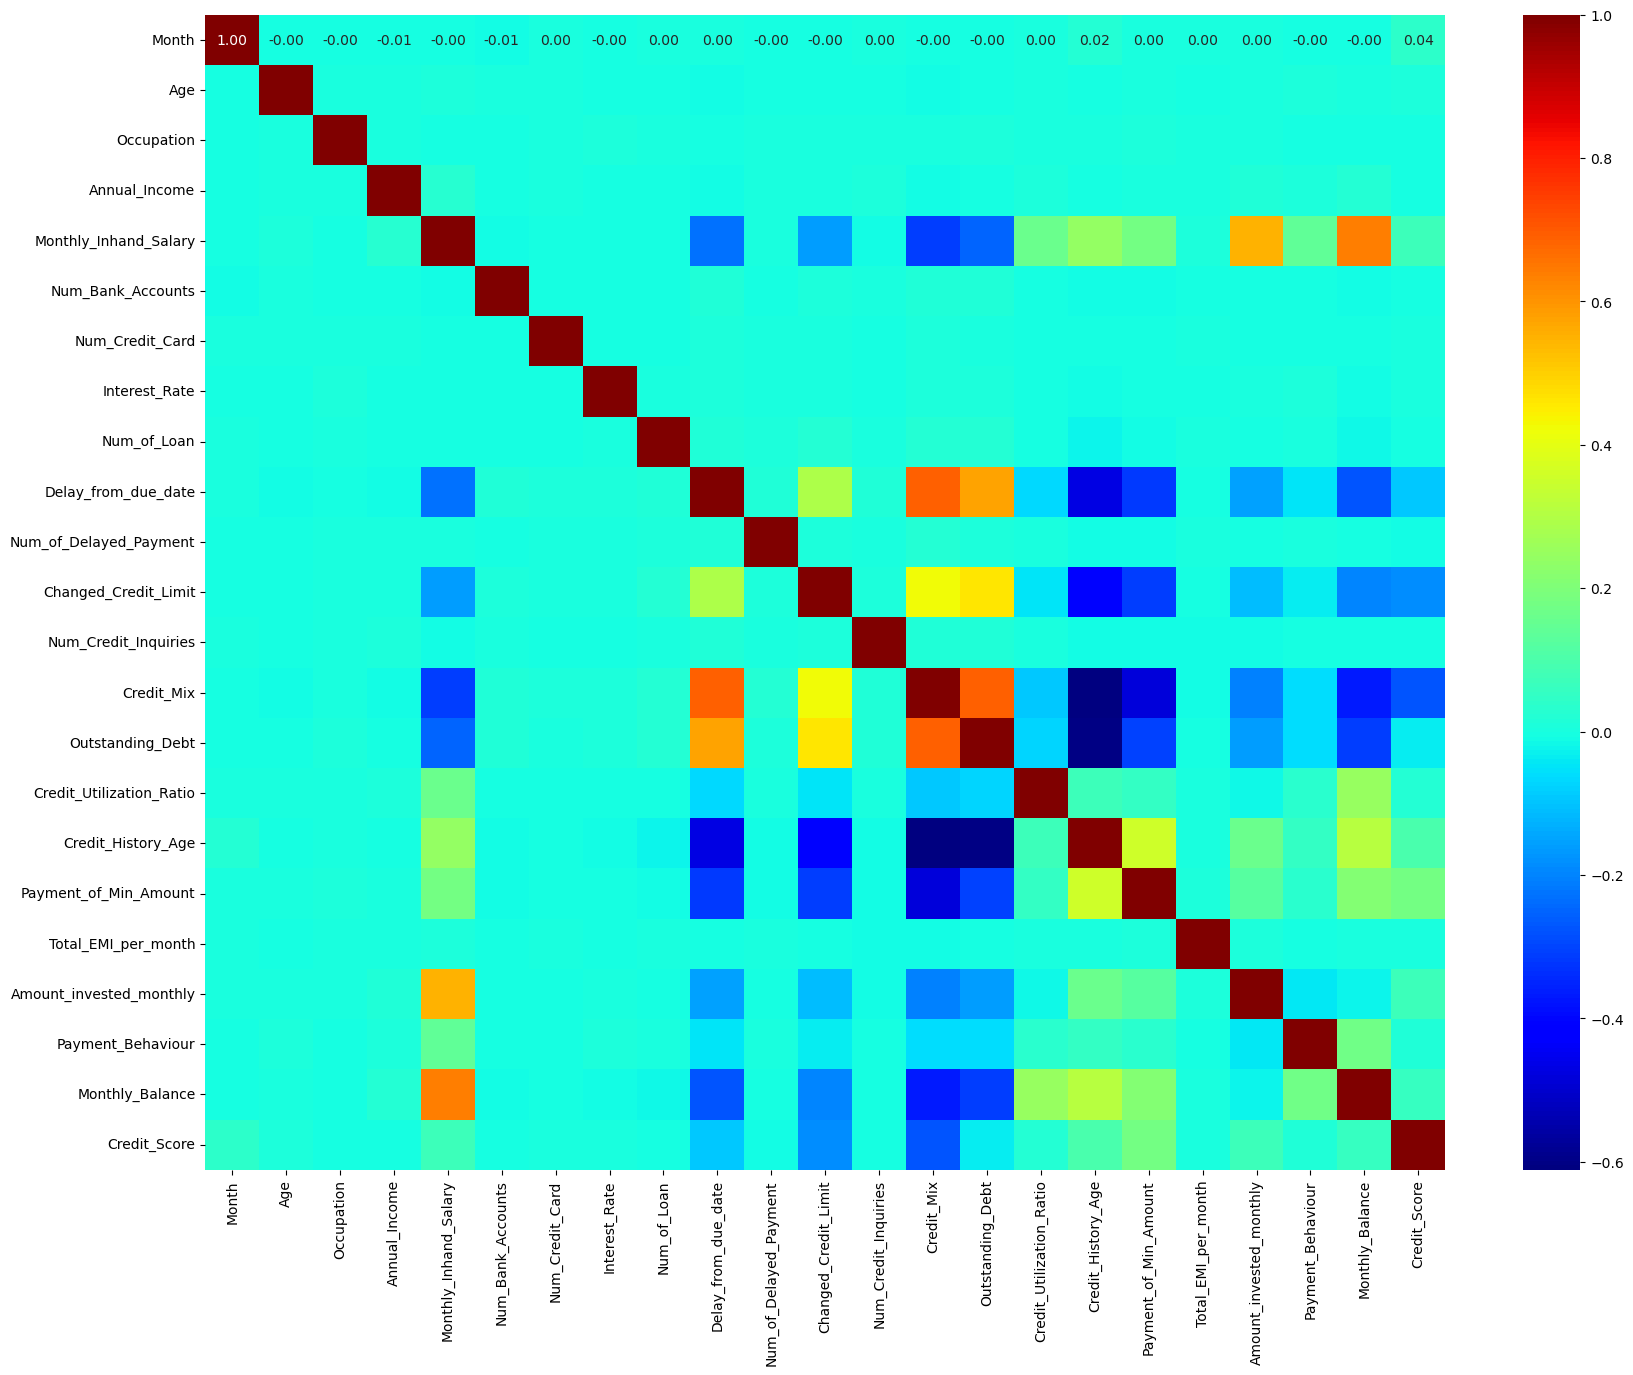

In [54]:
cr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cr,annot=True,fmt=".2f",cmap="jet")
plt.show()

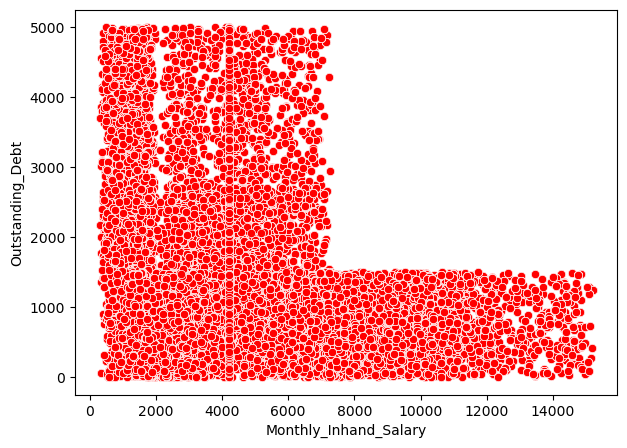

In [55]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Monthly_Inhand_Salary", y="Outstanding_Debt",color="red")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


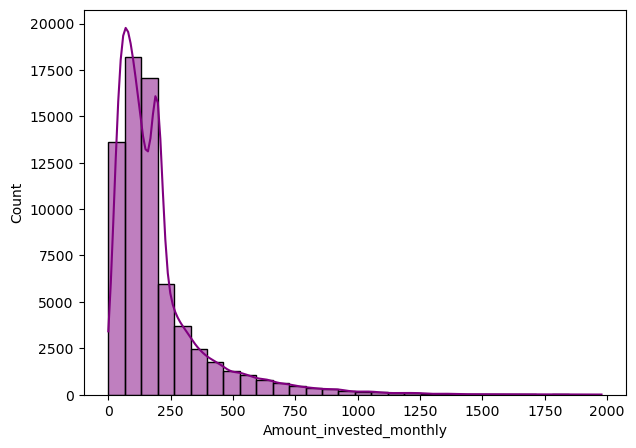

In [56]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Amount_invested_monthly", kde=True,bins=30,color="purple")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


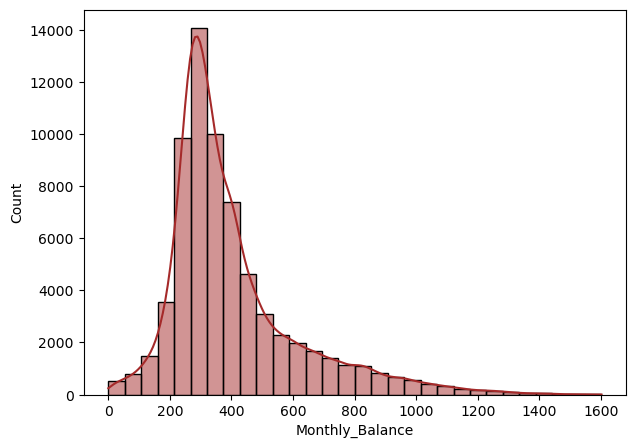

In [57]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Monthly_Balance", kde=True,bins=30,color="brown")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


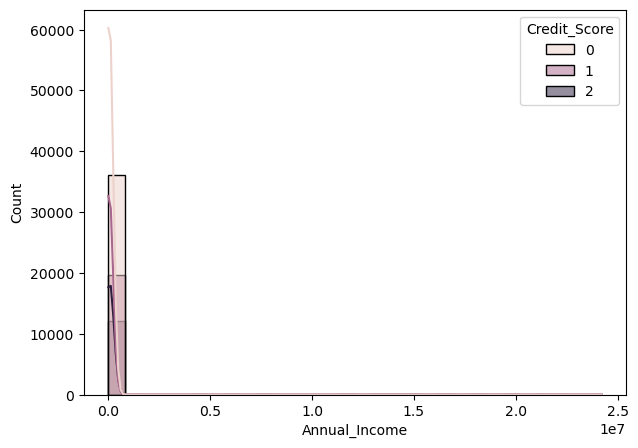

In [58]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Annual_Income", kde=True,bins=30,hue="Credit_Score")
plt.show()

## Data Scaling


In [59]:
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                    'Amount_invested_monthly', 'Monthly_Balance']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [60]:
x=df.drop("Credit_Score",axis=1)
y=df["Credit_Score"]

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Training

We will be training the dataset on 2 different models:

1.   Extreme Gradient Boosting Classifier
2.   Light Gradient Boosting Machine



In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


### Extreme Gradient Boosting Classifier

In [66]:
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
pred=xgb_classifier.predict(xtest)
xgb_ac=accuracy_score(ytest,pred)
print("XGB Accuracy Score :",xgb_ac)

XGB Accuracy Score : 0.7063074901445466


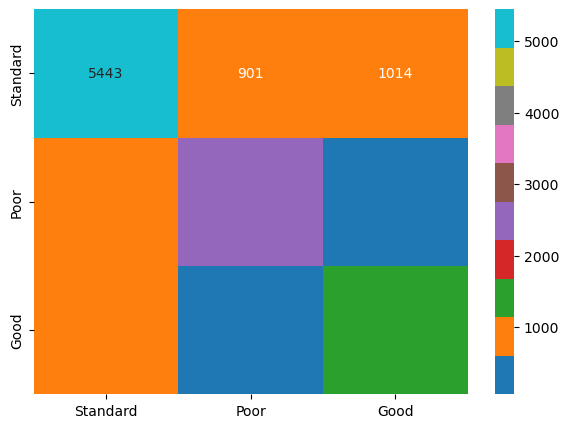

In [68]:
cf_mat=confusion_matrix(ytest, pred)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))

sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="tab10")
plt.show()

In [69]:
print(classification_report(ytest,pred,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.76      0.74      0.75      7358
        Poor       0.73      0.65      0.69      3933
        Good       0.56      0.70      0.62      2407

    accuracy                           0.71     13698
   macro avg       0.68      0.70      0.69     13698
weighted avg       0.71      0.71      0.71     13698



In [70]:
x_loss=xgb_classifier.predict_proba(xtest)
logloss = log_loss(ytest,x_loss)
print("Log Loss:", logloss)

Log Loss: 0.6492392670192046


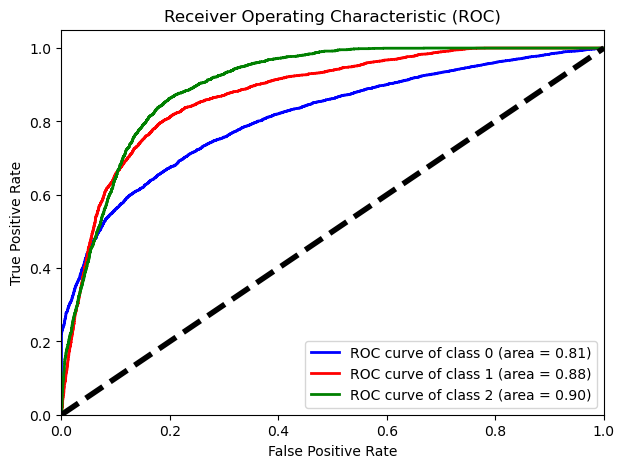

In [71]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,x_loss[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### LightGBM (Light Gradient Boosting Machine)

In [72]:
lgb_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=31,max_depth=-1,learning_rate=0.1,
                                n_estimators=100,

                                random_state=42,
                                objective='multiclass',  # Multi-class objective
                                metric='multi_logloss')

In [73]:
lgb_classifier.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3794
[LightGBM] [Info] Number of data points in the train set: 54790, number of used features: 22
[LightGBM] [Info] Start training from score -0.633113
[LightGBM] [Info] Start training from score -1.235680
[LightGBM] [Info] Start training from score -1.723577


LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=42)

In [74]:
pred0=lgb_classifier.predict(xtest)
acc0=accuracy_score(ytest,pred0)
print("accuracy score :",acc0)

accuracy score : 0.7275514673674989


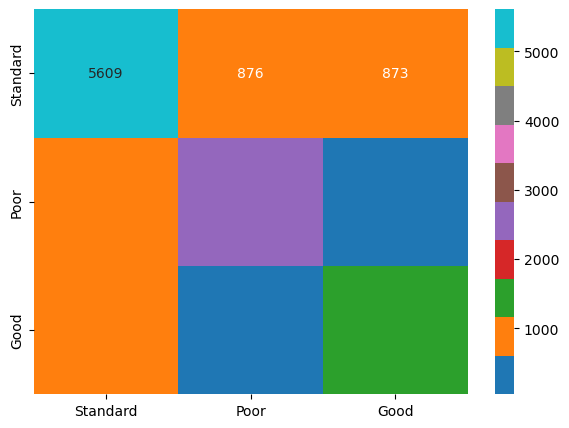

In [75]:
cf_mat=confusion_matrix(ytest, pred0)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))
sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="tab10")
plt.show()

In [76]:
print(classification_report(ytest,pred0,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.77      0.76      0.76      7358
        Poor       0.74      0.68      0.71      3933
        Good       0.61      0.70      0.65      2407

    accuracy                           0.73     13698
   macro avg       0.71      0.71      0.71     13698
weighted avg       0.73      0.73      0.73     13698



In [77]:
lgb=lgb_classifier.predict_proba(xtest)
logloss2 = log_loss(ytest,lgb)
print("Log Loss:", logloss2)

Log Loss: 0.598144550644379


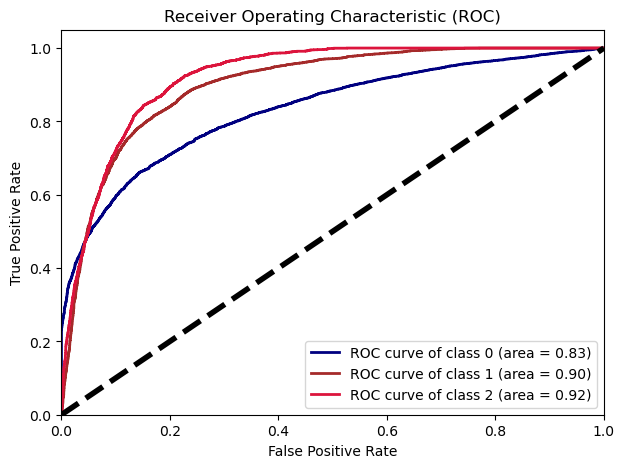

In [78]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,lgb[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['navy', 'brown', 'crimson']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Model Evaluation

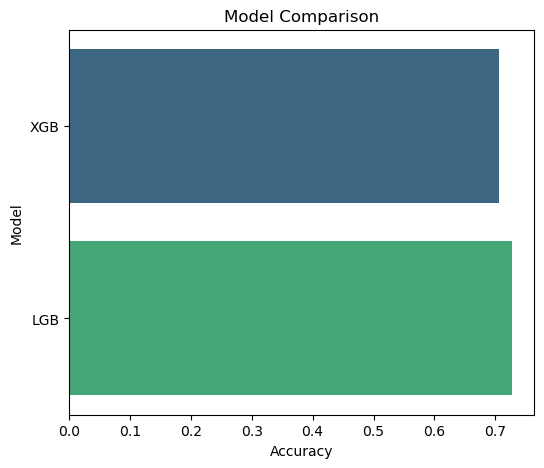

In [79]:
results = {'XGB': xgb_ac,'LGB': acc0}
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison')
plt.show()


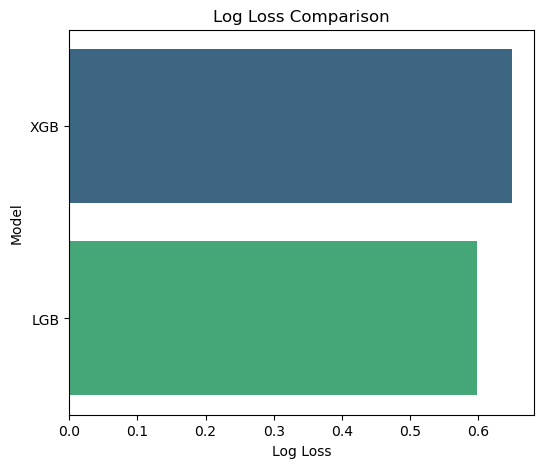

In [80]:
log_loss_results = {'XGB': logloss, 'LGB': logloss2}
log_loss_df = pd.DataFrame(list(log_loss_results.items()), columns=['Model', 'Log Loss'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Log Loss', data=log_loss_df, palette='viridis')
plt.title('Log Loss Comparison')
plt.show()


In [81]:
from xgboost import XGBClassifier
import joblib

# Assuming you have your trained XGBoost model in the xgb_classifier variable
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(xtrain, ytrain)  # Train the model, replace with your actual training data

# Save the model as a pkl file
model_filename = "xgb_model.pkl"
joblib.dump(xgb_classifier, model_filename)

print(f"XGBoost model saved as {model_filename}")


XGBoost model saved as xgb_model.pkl


### **Hence, LGBM is the most feasible model to train this dataset.**

## Model Saving

In [82]:
from lightgbm import LGBMClassifier
import joblib

# Assuming you have your trained LGBMClassifier in the lgb_classifier variable
lgb_classifier = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    objective='multiclass',  # Multi-class objective
    metric='multi_logloss'
)

# Train the model (replace with your actual training data)
lgb_classifier.fit(xtrain, ytrain)

# Save the LGBMClassifier as a pkl file
model_filename = "lgb_model.pkl"
joblib.dump(lgb_classifier, model_filename)

print(f"LGBMClassifier model saved as {model_filename}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3794
[LightGBM] [Info] Number of data points in the train set: 54790, number of used features: 22
[LightGBM] [Info] Start training from score -0.633113
[LightGBM] [Info] Start training from score -1.235680
[LightGBM] [Info] Start training from score -1.723577
LGBMClassifier model saved as lgb_model.pkl
